In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
# Importing train & test datasets
train_data = pd.read_csv('./Datasets/train.csv')
test_data = pd.read_csv('./Datasets/test.csv')

In [21]:
print('Train Data',train_data.shape)
print('Test Data',test_data.shape)

Train Data (4209, 378)
Test Data (4209, 377)


In [22]:
train_data

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


#### **Q. If for any column(s), the variance is equal to zero, then you need to remove those variable(s).**
#### Checking variance

In [23]:
variance = pow(train_data.drop(columns={'ID','y'}).std(),2).to_dict()

zero_var = []
for key, value in variance.items():
    if(value==0):
        print('Column: ',key)
        zero_var.append(key)
print('No of columns which has zero variance = ',len(zero_var))

Column:  X11
Column:  X93
Column:  X107
Column:  X233
Column:  X235
Column:  X268
Column:  X289
Column:  X290
Column:  X293
Column:  X297
Column:  X330
Column:  X347
No of columns which has zero variance =  12


/var/folders/5k/yp3_f__53c38cdrv0bkcgx4m0000gn/T/ipykernel_2655/1253409149.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance = pow(train_data.drop(columns={'ID','y'}).std(),2).to_dict()


In [24]:
# Droping Columns having zero variance
train_data = train_data.drop(columns=zero_var)
train_data.shape

(4209, 366)

In [25]:
train_data

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


#### **Q. Check for null and unique values for test and train sets.**

In [26]:
# Checking in Train Data
train_data.isna().sum().any()

False

In [27]:
# Checking ion Test Data
test_data.isna().sum().any()

False

#### **Q. Apply label encoder**

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
train_features =  train_data.drop(columns={'ID','y'})
train_target = train_data.y
train_features.shape

(4209, 364)

In [30]:
for i in train_features.describe(include='object').keys():
    le = LabelEncoder()
    train_features[i] = le.fit_transform(train_features[i])

In [31]:
# Label Encoded Features
train_features

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,31,16,40,3,3,0,7,7,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,8,23,38,0,3,0,6,4,0,1,...,0,0,1,0,0,0,0,0,0,0
4207,9,19,25,5,3,0,11,20,0,0,...,0,0,0,0,0,0,0,0,0,0


#### **Q. Perform dimensionality reduction.**

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)

In [33]:
# pca.fit(train_features, train_target)

In [34]:
train_feature_pca = pca.fit_transform(train_features)
train_feature_pca.shape

(4209, 6)

#### **Q. Predicting on Test Data by XGBoost**

In [49]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [39]:
x_train,x_test,y_train,y_test = train_test_split(train_feature_pca,train_target,test_size=0.3,random_state=7)
print(
    x_train.shape,
    x_test.shape,
    y_train.shape,
    y_test.shape,
)

(2946, 6) (1263, 6) (2946,) (1263,)


In [47]:
xgb_reg = XGBRegressor()

In [45]:
gbm_param = {
    
    'n_estimators':[40,50,60],
    'max_depth':[3,4,5],
    'learning_rate':[.001,.0001,.002,.03,.01,.02,.3],
    'lambda':[.001,.0001,.002,.03,.01,.02,.3],
    'alpha':[.001,.0001,.002,.03,.01,.02,.3]
    
}

In [52]:
rscv = RandomizedSearchCV(xgb,param_distributions=gbm_param, n_iter=20,scoring='neg_mean_squared_error',n_jobs=-1)

In [53]:
rscv.fit(train_feature_pca,train_target)

[20:54:26] WARNING: ../src/learner.cc:576: 
Parameters: { "xgb__alpha", "xgb__lambda", "xgb__learning_rate", "xgb__max_depth", "xgb__n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:54:26] WARNING: ../src/learner.cc:576: 
Parameters: { "xgb__alpha", "xgb__lambda", "xgb__learning_rate", "xgb__max_depth", "xgb__n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:54:26] WARNING: ../src/learner.cc:576: 
Parameters: { "xgb__alpha", "xgb__lambda", "xgb__learning_rate", "xgb__max_depth",

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,...
                                          tree_method=None,
                                          validate_parameters=None,
                                          verbosity=None),
                   n_ite

In [54]:
rscv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None, xgb__alpha=0.01,
             xgb__lambda=0.0001, ...)

In [55]:
rscv.best_params_

{'xgb__n_estimators': 50,
 'xgb__max_depth': 3,
 'xgb__learning_rate': 0.03,
 'xgb__lambda': 0.0001,
 'xgb__alpha': 0.01}

In [56]:
xgb_model = rscv.best_estimator_

In [57]:
test_pred = xgb_model.predict(x_test)
test_pred

array([109.3494  ,  91.47112 , 109.273026, ..., 108.74405 ,  91.27071 ,
        95.27096 ], dtype=float32)

/Users/abhisheksingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/abhisheksingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


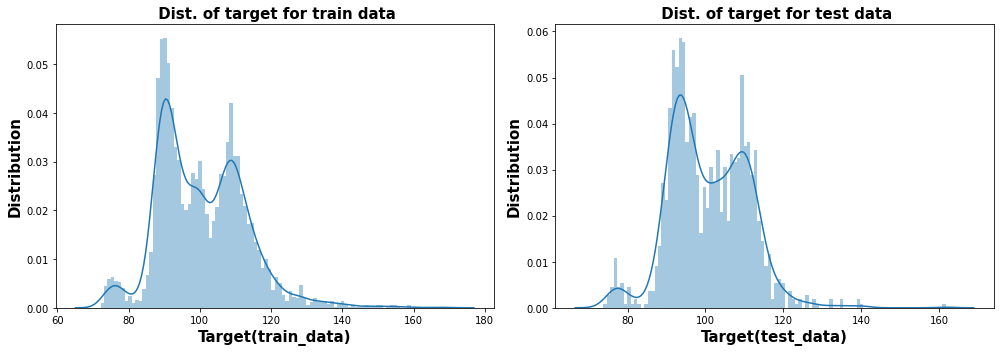

In [60]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

train_plot = sns.distplot(train_target[train_target<200], bins=100, kde=True, ax=ax[0])
train_plot.set_xlabel('Target(train_data)', weight='bold', size=15)
train_plot.set_ylabel('Distribution', weight='bold', size=15)
train_plot.set_title(' Dist. of target for train data', weight='bold', size=15)

test_plot = sns.distplot(test_pred[test_pred<200], bins=100, kde=True, ax=ax[1])
test_plot.set_xlabel('Target(test_data)', weight='bold', size=15)
test_plot.set_ylabel('Distribution', weight='bold', size=15)
test_plot.set_title(' Dist. of target for test data', weight='bold', size=15)

plt.tight_layout()